In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Voice

[Errno 2] No such file or directory: 'drive/MyDrive/Voice'
/content/drive/MyDrive/Voice


In [ ]:
import os
import numpy as np
from google.colab.patches import cv2_imshow
import cv2 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [ ]:
print(775//4)

193

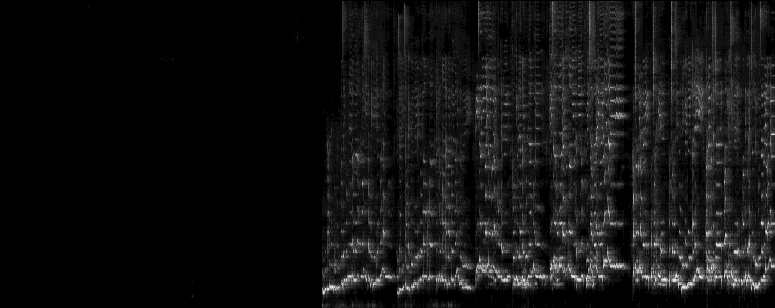

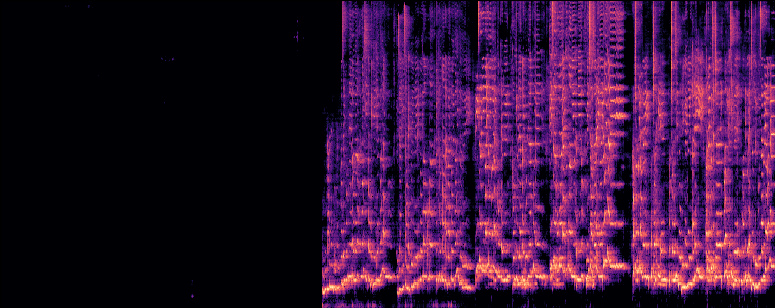

(102, 258)


In [ ]:
img_path = "Data/Data/Test/CẨM LY/Ang-May-Buon-Cam-Ly/spectogram/img30.png"
img = cv2.resize(cv2.imread(img_path),(258,102))
img2 = cv2.imread(img_path)
cv2_imshow(img2[:,:,1])
cv2_imshow(img2)
print(img[:,:,1].shape)


In [ ]:

# def load_data(src):
#   data = []
#   label = []
#   for i in os.listdir(src):
#       for j in os.listdir(src+i):
#           s = src+i+"/"+ j
#           if(s.endswith(".wav")==False):
#             file_img = s+"/" +"melspectrogram.png"
#             img = cv2.imread(file_img)
#             img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)[:,:,1]/255.0
#             data.append(img)
#             label.append(i)
#   data = np.array(data)
#   le = preprocessing.LabelEncoder()
#   label = le.fit_transform(label)
#   print(f"Tim thay {len(le.classes_)} loai {le.classes_}")
#   label = np.array(label)
#   label = np.reshape(label,(-1,1))
#   one_hot = OneHotEncoder(handle_unknown='ignore')
#   label = one_hot.fit_transform(label).toarray()
#   print(data.shape)
#   print(len(label))
#   print(label.shape)
#   return data, label

# # cv2_imshow(test_set[0])

In [ ]:
775//6

129

In [ ]:
308//6

51

In [ ]:
import os
import numpy as np
from google.colab.patches import cv2_imshow
import cv2 
import gc
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
list_singer = os.listdir("Data/Data/Test/")
src = "Data/Data/Test/"
def load_data(src):
  data = []
  label = []
  for i in list_singer:
      for j in os.listdir(src+"/"+i):
          s = src+"/"+i+"/"+ j
          if(s.endswith(".wav")==False):
            folder_img = s+"/" +"spectogram"
            for g in os.listdir(folder_img):
              file_img = folder_img+"/"+g
              img = cv2.resize(cv2.imread(file_img),(258,102))
              data.append(img)
              label.append(i)
              del img
              gc.collect()
  data = np.array(data)
  le = preprocessing.LabelEncoder()
  label = le.fit_transform(label)
  print(f"Tim thay {len(le.classes_)} loai {le.classes_}")
  label = np.array(label)
  label = np.reshape(label,(-1,1))
  one_hot = OneHotEncoder(handle_unknown='ignore')
  label = one_hot.fit_transform(label).toarray()
  print(data.shape)
  print(len(label))
  print(label.shape)
  return data, label


In [ ]:
src = "Data/Data/Test/"

test_set, test_label = load_data(src)

src2 = "Data/Data/Train/"

train_set, train_label  =  load_data(src2)

Tim thay 6 loai ['CẨM LY' 'DAN_NGUYEN' 'DƯƠNG_NGOC_THAI' 'MINH TUYẾT' 'MỸ TÂM'
 'QUANG_LE']
(6977, 102, 258, 3)
6977
(6977, 6)
Tim thay 6 loai ['CẨM LY' 'DAN_NGUYEN' 'DƯƠNG_NGOC_THAI' 'MINH TUYẾT' 'MỸ TÂM'
 'QUANG_LE']
(19957, 102, 258, 3)
19957
(19957, 6)


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

# Khởi tạo đối tượng mô hình VGG16
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(102,258, 3))

# Đóng băng tất cả các lớp của mô hình VGG16
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:

# Tạo một mô hình mới và thêm các lớp vào đó
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
model.fit(train_set, train_label,  epochs=20, validation_data=(test_set, test_label),batch_size=128)
model.save("model.h5")

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
import tensorflow as tf
resnet = tf.keras.applications.ResNet50( 
    include_top=True,
    weights="imagenet",
     input_shape=(120,120, 3))


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam

# Xây dựng mô hình CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(102,258,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Biên dịch mô hình
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# In thông tin về kiến trúc của mô hình
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 128, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 126, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 61, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 30, 128)      0

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.fit(train_set, train_label,  epochs=20, validation_data=(test_set, test_label),batch_size=128)
model.save("model.h5")

Epoch 1/20
156/156 [==============================] - 30s 117ms/step - loss: 1.4262 - accuracy: 0.4492 - val_loss: 1.1058 - val_accuracy: 0.5544
Epoch 2/20
156/156 [==============================] - 16s 102ms/step - loss: 0.5558 - accuracy: 0.7991 - val_loss: 0.7485 - val_accuracy: 0.7099
Epoch 3/20
156/156 [==============================] - 16s 103ms/step - loss: 0.3458 - accuracy: 0.8793 - val_loss: 0.6930 - val_accuracy: 0.7485
Epoch 4/20
156/156 [==============================] - 15s 96ms/step - loss: 0.2388 - accuracy: 0.9176 - val_loss: 0.6769 - val_accuracy: 0.7558
Epoch 5/20
156/156 [==============================] - 16s 104ms/step - loss: 0.1735 - accuracy: 0.9419 - val_loss: 0.7164 - val_accuracy: 0.7672
Epoch 6/20
156/156 [==============================] - 16s 105ms/step - loss: 0.1288 - accuracy: 0.9596 - val_loss: 0.6984 - val_accuracy: 0.7777
Epoch 7/20
156/156 [==============================] - 15s 99ms/step - loss: 0.0983 - accuracy: 0.9698 - val_loss: 0.7743 - val_accu